In [210]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import random as rand

(200, 5)
(1, 200)
[ 1  1  1 -1  1]


Text(0, 0.5, 'y')

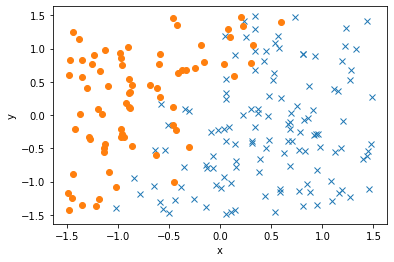

In [233]:
# prepare dataset
np.random.seed(777)
n = 200
dim = 4
x = 3*(np.random.rand(n,dim) - 0.5)
x = np.insert(x,dim,1,axis=1)
y = (2 * x[:,1] - 1 * x[:,2] + 0.5 + 0.5 * np.random.randn(1,n)) > 0
y = 2 * y -1

print(x.shape)
print(y.shape)
print(y[0,0:5])

plt.plot(np.extract(y>0,x[:,1]),np.extract(y>0,x[:,2]), 'x')
plt.plot(np.extract(y<0,x[:,1]),np.extract(y<0,x[:,2]), 'o')
plt.xlabel('x')
plt.ylabel('y')


1.Implement batch steepest gradient method

54.351275147178825
53.92867976764176
[ 0.30873312  4.63542467 -2.25528783 -0.25198809]


Text(0, 0.5, 'loss')

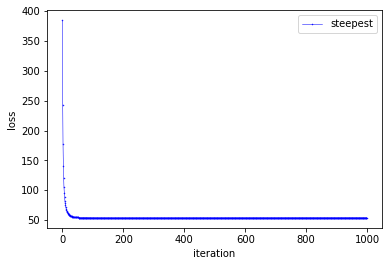

In [239]:
## gradient discent
num_iter = 1000
ww = 3 * np.ones(dim)
b = 1
alpha_base = 1
lam = 0.01
ll_history_s = []
ww_history_s = []
eig = np.linalg.eig(x.T @ x + lam * np.identity(dim+1))
lip = 0.25 * max(eig[0])
print(lip)
for t in range(1,num_iter+1):
    posterior = 1 / (1 + np.exp(-y * (ww[0:dim] @ x[:,0:dim].T + b * x[:,dim])))
    direction = - (np.sum((1 - posterior) * (-y) * x[:,0:dim].T,axis = 1) + 2 * lam * ww)
    ll = np.sum(np.log(1 + np.exp(-y * (ww @ x[:,0:dim].T)))) + lam * (ww.T @ ww)
    ll_history_s.append(ll)
    ww_history_s.append(ww)
    ww = ww + alpha_base * 1.0 / np.sqrt(t) / lip * direction
print(ll_history_s[-1])
print(ww)

plt.plot(ll_history_s, 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')

2.Implement Newton based method

[ 0.31643249  4.76698364 -2.32393095 -0.26763069]


Text(0, 0.5, 'loss')

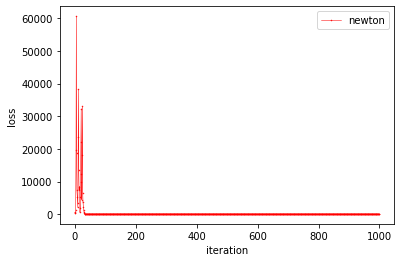

In [284]:
# newton
num_iter = 1000
lam = 0.01
ll_history_n = []
ww_history_n = []
ww = 3 * np.ones(dim)
b = 1

def _hess(p):
    s = np.zeros((dim,dim))
    for i in range(n):
        s = s + p[0,i] * (1 - p[0,i]) * (x[i,0:dim].reshape(-1,1) @ x[i,0:dim].reshape(1,-1))      
    return s + 2 * lam * np.identity(dim)

for t in range(num_iter):

    a = np.array(-y * (ww @ x[:,0:dim].T + b * x[:,dim]) , dtype = np.float128) # to avoid overflow
    posterior = 1 / (1 + np.exp(a))
    grad = np.sum((1 - posterior) * (-y) * x[:,0:dim].T ,axis = 1) + 2 * lam * ww
    hess = _hess(posterior)
    c = np.array(-y * (ww @ x[:,0:dim].T), dtype = np.float128) # to avoid overflow
    ll = np.sum(np.log(1.0 + np.exp(c + b * x[:,dim]))) + lam * (ww.T @ ww)
    ll_history_n.append(ll)
    ww_history_n.append(ww)
    #print(np.linalg.inv(hess).shape)
    #print(grad.reshape(1,-1).shape)
    ww = ww - np.matmul(np.linalg.inv(hess), grad) * 1.0 / np.sqrt(t+10)
print(ww)

plt.plot(ll_history_n, 'ro-', linewidth=0.5, markersize=0.5, label='newton')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')

3.Compare the performance

Text(0, 0.5, '|J(wt) - J(w^)|')

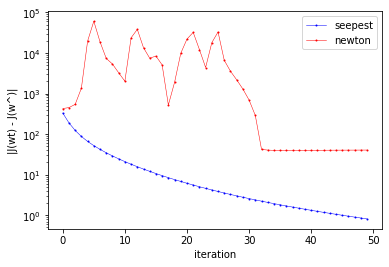

In [285]:
# j_min
show_iter = 50
min_ll = min(min(ll_history_s), min(ll_history_n))

plt.plot(np.abs(ll_history_s[:show_iter] - min_ll), 'bo-', linewidth=0.5, markersize=1, label='seepest')
plt.plot(np.abs(ll_history_n[:show_iter] - min_ll), 'ro-', linewidth=0.5, markersize=1, label='newton')
plt.legend()
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('|J(wt) - J(w^)|')